___

___
# Linear Regression Project


Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [94]:
Dataframe=pd.read_csv('Ecommerce Customers')

In [95]:
Dataframe.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [96]:
Dataframe.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [97]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.

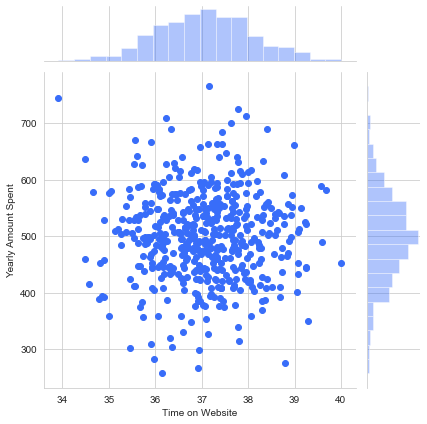

In [98]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Dataframe)

In [99]:
sns.set_palette("rainbow")
sns.set_style('whitegrid')

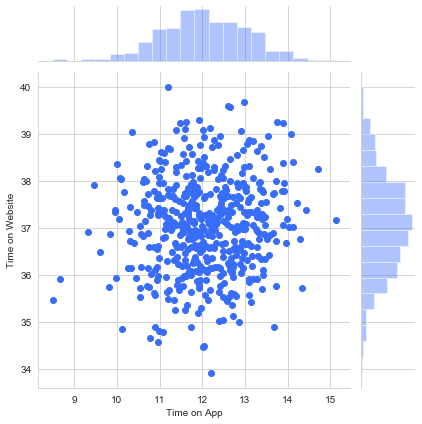

In [100]:
sns.jointplot(x='Time on App',y='Time on Website',data=Dataframe)

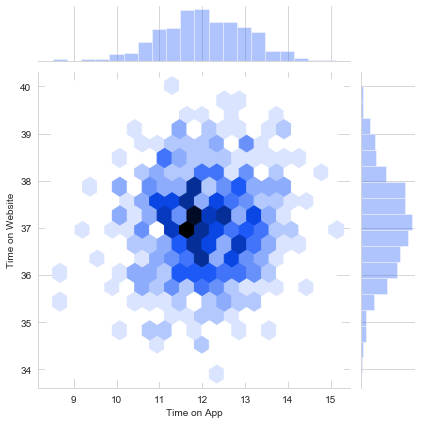

In [101]:
sns.jointplot(x='Time on App',y='Time on Website',kind='hex',data=Dataframe)

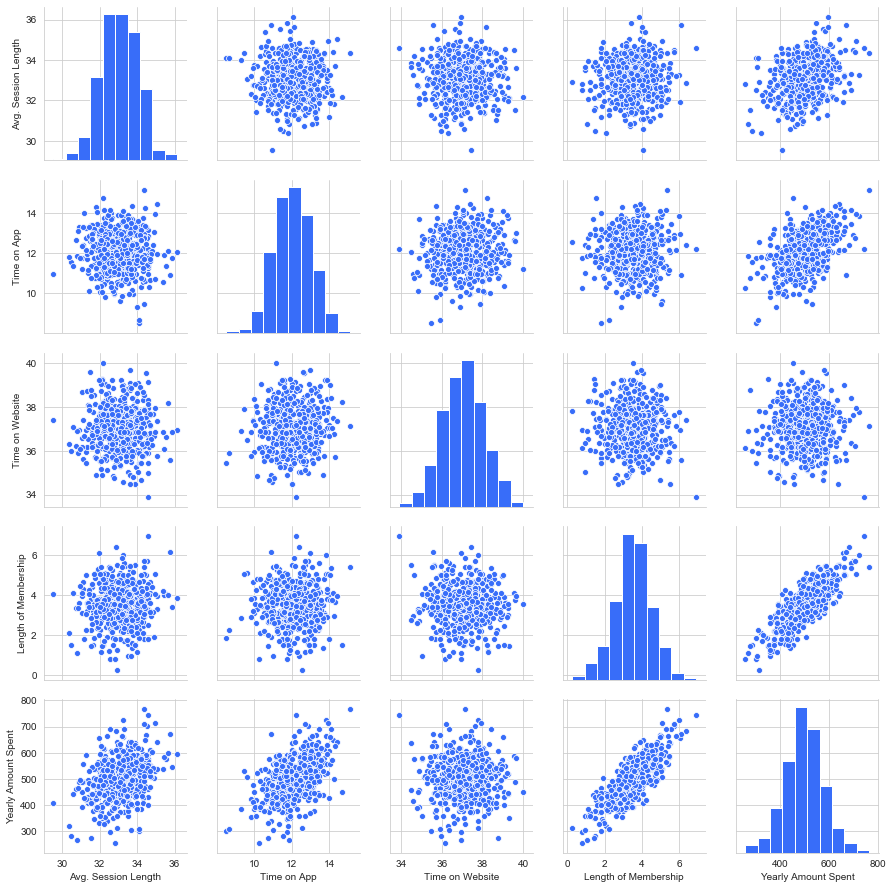

In [102]:
sns.pairplot(Dataframe)

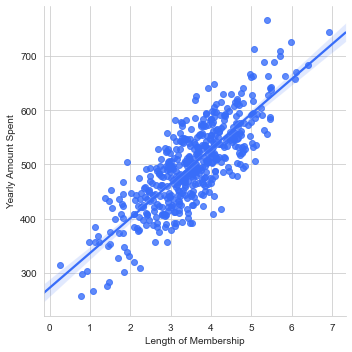

In [103]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=Dataframe)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.


In [104]:
X=Dataframe[['Time on App','Time on Website','Length of Membership']]

In [105]:
Y=Dataframe['Yearly Amount Spent']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model


In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
lm=LinearRegression()

In [110]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
print('coefficient are ',lm.coef_)


coefficient are  [36.74667786  1.07348102 62.10453279]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!



In [112]:
prediction=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

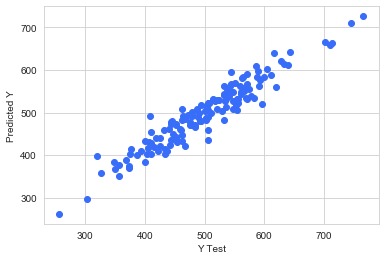

In [113]:
plt.scatter(Y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [114]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 20.720332884727114
MSE: 680.1237822789808
RMSE: 26.07918292966597


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 



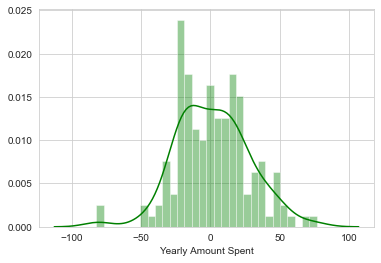

In [115]:
sns.distplot((Y_test-prediction),bins=30,color='green')

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [116]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Time on App,36.746678
Time on Website,1.073481
Length of Membership,62.104533


<<<<< Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
<<<<< Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
<<<<<< Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

**Do you think the company should focus more on their mobile app or on their website?**

Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better.

$$ END $$